In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from IPython.display import Image


In [2]:
Image(url='https://assets.iflscience.com/assets/articleNo/69767/aImg/69204/fake-or-real-meta.png', width=1000)

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
df = pd.read_csv(r'C:\Users\ZMZM\Desktop\Dataset\news.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


## 1:  Fake News
## 2:  Real News

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df = df.fillna('')

In [7]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


<Axes: xlabel='label'>

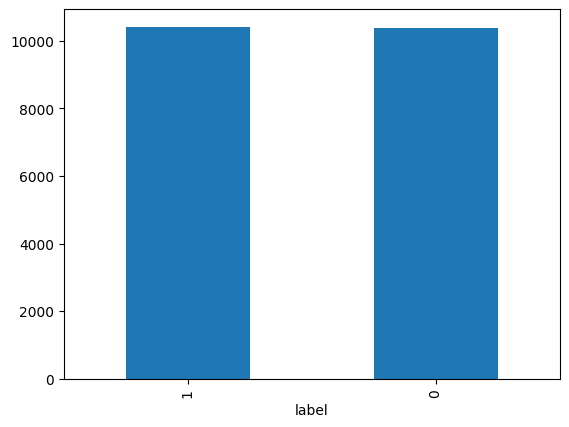

In [10]:
df['label'].value_counts().plot(kind='bar')

In [11]:
df['content'] = df['author']+' '+df['title']

In [12]:
df['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [13]:
# separating the data & label
X = df.drop(columns='label' , axis=1)
y = df['label']

In [14]:
X

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy Iranian woman jailed for fictio...
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,Michael J. de la Merced and Rachel Abrams Macy...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...","Alex Ansary NATO, Russia To Hold Parallel Exer..."


In [15]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [16]:
port_stem = PorterStemmer()

In [17]:
def stemming(content):
    stemmed_content = re.sub('[˄a-zA-z],',' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
    

In [18]:
df['content'] = df['content'].apply(stemming)

In [19]:
print(df['content'])

0        darrel lucu hous dem aide: didn’t even see com...
1        daniel j. flynn flynn: hillari clinto big woma...
2                  consortiumnews.com truth might get fire
3        jessica purkiss 15 civilian kill singl us airs...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper t.i.: trump ’poster child ...
20796    benjamin hoffman n.f.l. playoffs: schedul matc...
20797    michael j. de la merc rachel abram macy’ said ...
20798    alex ansari nat russia hold parallel exercis b...
20799                         david swanson keep f-35 aliv
Name: content, Length: 20800, dtype: object


In [20]:
# separating the data & label
X = df['content'].values
y = df['label'].values

In [21]:
print(X)

['darrel lucu hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'
 'daniel j. flynn flynn: hillari clinto big woman campu - breitbart'
 'consortiumnews.com truth might get fire' ...
 'michael j. de la merc rachel abram macy’ said receiv takeov approach hudson’ bay - new york time'
 'alex ansari nat russia hold parallel exercis balkan'
 'david swanson keep f-35 aliv']


In [22]:
print(y)

[1 0 1 ... 0 1 1]


In [23]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [24]:
print(X)

  (0, 19690)	0.2707524924236901
  (0, 16993)	0.23657500428226982
  (0, 11423)	0.3335834569339999
  (0, 11085)	0.26867913406443367
  (0, 9999)	0.22739333087388314
  (0, 9118)	0.2051808187185159
  (0, 6629)	0.21389213615736222
  (0, 5412)	0.2744733135119046
  (0, 5146)	0.24982904839258457
  (0, 4909)	0.3301866134165259
  (0, 4072)	0.2271602610877475
  (0, 3498)	0.3414174549077228
  (0, 820)	0.36436410155794613
  (1, 21040)	0.2882496422556945
  (1, 8889)	0.19023592728586014
  (1, 7318)	0.6919765846126548
  (1, 4874)	0.2521947264730469
  (1, 3895)	0.3190386473446404
  (1, 3182)	0.3677873216804523
  (1, 2781)	0.14844508332853035
  (1, 2311)	0.28142414029956847
  (2, 19603)	0.4147744393844855
  (2, 12259)	0.49135200123786854
  (2, 7888)	0.34593851964036826
  (2, 7181)	0.39364329037139567
  :	:
  (20797, 15611)	0.2725501410977063
  (20797, 15374)	0.24770583842787186
  (20797, 13099)	0.08027761287290788
  (20797, 12222)	0.17456690945215164
  (20797, 12140)	0.29532890798601424
  (20797, 11531)	

### Splitting the dataset to training & testing

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=2)

### Training the Model: Logistic Regression

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)

LogisticRegression()

### Evaluation

In [28]:
# Accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [29]:
print("Accuracy score of the training data : ", training_data_accuracy )

Accuracy score of the training data :  0.9867788461538461


In [30]:
# Accuracy score on the testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [31]:
print("Accuracy score of the testing data : ", testing_data_accuracy )

Accuracy score of the testing data :  0.9774038461538461


### 🤖 Making a Predictive System

In [32]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
   print('The news is Real')
else:
    print('The news is Fake')


[1]
The news is Fake


In [33]:
print(y_test[0])

1


#

# Regards, Tariq Ibrahim